# Solve example problem of a fishiery with an unknow growth rate 

This is an example problem of a continuous state POMDP with both state adn parametric uncertainty. 

## Start by solving the problem when the system is fully observed  

Define problem and solve using `BeleifMDPSolvers.solve_observed_parallel`

In [1]:
# Initialize model 
using Plots
include("Examples.jl")
include("ValueFunctions.jl")
include("BeleifMDPSolvers.jl")


pars = Examples.unknown_growth_rate_pars

T_! = (x,f) -> Examples.unknown_growth_rate_T!(x,f,pars)
T_ = (x,f) -> Examples.unknown_growth_rate_T(x,f,pars)
R = (x,f,obs) -> Examples.unknown_growth_rate_R(x,f,obs,pars)
R_obs = (x,f) -> Examples.unknown_growth_rate_R_obs(x,f,pars)
Sigma_N = Examples.Sigma_N
H = (x,a,obs) -> Examples.H * x
Sigma_O = (a,obs) -> reshape(Examples.Sigma_O(obs),1,1)
delta = 0.95
actions = Examples.unknown_growth_actions
observations = Examples.unknown_growth_observations

upper = Examples.unknown_growth_upper
lower = Examples.unknown_growth_lower

solver1 = BeleifMDPSolvers.init(T_!, T_, R, R_obs, Examples.H, Sigma_N, Sigma_O,delta,actions,observations,lower,upper;
            m_Quad_x = 6, m_Quad_y = 6,m_Quad = 8,
            n_grids_obs = 10,n_grid = 5)

BeleifMDPSolvers.solve_observed_parallel(solver1)

here1 100.01
2 339.3891345440783
3 19.16213889704406
4 31.542846010535207
5 18.86512357864312
6 18.461575794200197
7 13.576771613876836
8 12.797998719690359
9 9.826039339882913
10 9.152749477579903
11 7.181352055985758
12 6.596221588125062
13 5.284240591650727
14 4.795733888884771
15 3.906273999610243
16 3.511967134555274
17 2.8992928741865223
18 2.5875233446998664
19 2.159710864535725
20 1.9167510790048232
21 1.6142603701058336
22 1.4267458856834243
23 1.210481988449886
24 1.0666791635872364
25 0.9105390969737683
26 0.8006996053894033
27 0.6869862624888294
28 0.6032860927372898
29 0.5198328989459599
30 0.4561301424056501
31 0.39446688902650384
32 0.3460021363824051
33 0.3001628164940738
34 0.2632819453718137
35 0.2290174005993253
36 0.20093252601432013
37 0.1751935742480389
38 0.1537835633293195
39 0.13436376467826866
40 0.11801916917140212
41 0.10330868991179515
42 0.09081066230785542
43 0.07962687054456093
44 0.07005295562549432
45 0.061521773822655335
46 0.0541737767744224
47 0.047

"two stage VFI: Observed model solved"

## Plot Policy Function 

In [2]:
using JLD2
VF_dat = (solver1.valueFunction.baseValue.values, solver1.valueFunction.uncertantyAdjustment.chebyshevInterpolation.values)
@save "data/tests.jld2" VF_dat

In [17]:

@load "data/tests.jld2" VF_dat

1-element Array{Symbol,1}:
 :VF_dat

In [ ]:
solver1 = BeleifMDPSolvers.init(T_!, T_, R, R_obs, Examples.H, Sigma_N, Sigma_O,delta,actions,observations,lower,upper;
            m_Quad_x = 6, m_Quad_y = 6,m_Quad = 8,
            n_grids_obs = 10,n_grid = 5)

In [ ]:
include("ValueFunctions.jl")
ValueFunctions.update_interpolation!(solver1.valueFunction.baseValue, VF_dat[1])
ValueFunctions.update_interpolation!(solver1.valueFunction.uncertantyAdjustment.chebyshevInterpolation, VF_dat[2])


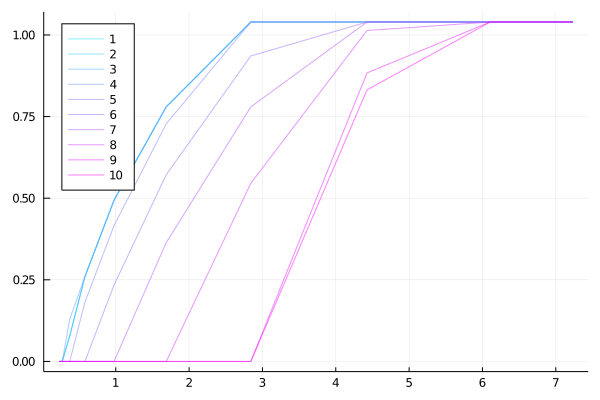

In [22]:

include("BellmanOpperators.jl")
n_grid = 10
sol = solver1
act = broadcast(x -> BellmanOpperators.obs_Policy(x, sol.obsBellmanIntermidiate[1],sol.valueFunction.baseValue, sol.POMDP, sol.optimizer),
solver1.valueFunction.baseValue.grid)
act = broadcast(x -> x[1],act)
act = reshape(act, n_grid,n_grid)
x = reshape(broadcast( x ->x[1], sol.valueFunction.baseValue.grid),n_grid,n_grid)
p = Plots.plot(exp.(x[:,1]), act[:,1], label = "1", legend =:topleft,color = RGBA(1/n_grid,1-1/n_grid,1,0.5))
for i in 2:n_grid
    Plots.plot!(p,exp.(x[:,n_grid]),act[:,i], label = string(i),color = RGBA(i/n_grid,1-i/n_grid,1,0.5))
end 
p

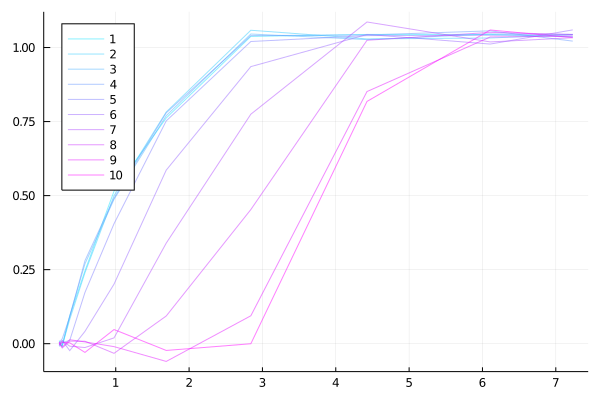

In [23]:
include("BellmanOpperators.jl")
n_grid = 10
sol = solver1
BeleifMDPSolvers.update_policyFunction_obs!(solver1)
act = broadcast(x -> sol.policyFunction.actionPolynomials[1].baseValue(x),solver1.valueFunction.baseValue.grid)
act = broadcast(x -> x[1],act)
act = reshape(act, n_grid,n_grid)
x = reshape(broadcast( x ->x[1], sol.valueFunction.baseValue.grid),n_grid,n_grid)
p = Plots.plot(exp.(x[:,1]), act[:,1], label = "1", legend =:topleft,color = RGBA(1/n_grid,1-1/n_grid,1,0.5))
for i in 2:n_grid
    Plots.plot!(p,exp.(x[:,n_grid]),act[:,i], label = string(i),color = RGBA(i/n_grid,1-i/n_grid,1,0.5))
end 
p

## Plot value function 

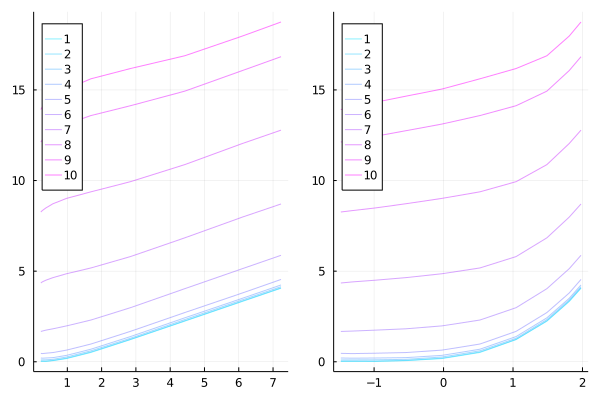

In [24]:
n_grid = 10
sol = solver1
act = broadcast(x -> sol.valueFunction.baseValue(x),sol.valueFunction.baseValue.grid)
act = broadcast(x -> x[1],act)
act = reshape(act, n_grid,n_grid)
x = reshape(broadcast( x ->x[1], sol.valueFunction.baseValue.grid),n_grid,n_grid)
p = Plots.plot(exp.(x[:,1]), act[:,1], label = "1", legend =:topleft,color = RGBA(1/n_grid,1-1/n_grid,1,0.5))
for i in 2:n_grid
    Plots.plot!(p,exp.(x[:,n_grid]),act[:,i], label = string(i), color = RGBA(i/n_grid,1 - i/n_grid,1,0.5))
end 
p

p1 = Plots.plot(x[:,1], act[:,1], label = "1", legend =:topleft,color = RGBA(1/n_grid,1-1/n_grid,1,0.5))
for i in 2:n_grid
    Plots.plot!(p1,x[:,n_grid],act[:,i], label = string(i), color = RGBA(i/n_grid,1 - i/n_grid,1,0.5))
end 
p1
plot(p,p1)

## Simulate time series 

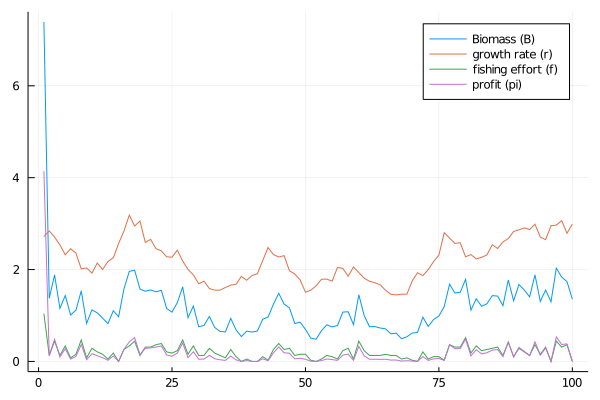

In [26]:

include("Simulations.jl")

sol = solver1

x0 = [2.0, 1.0]
x, pi, act = Simulations.simulate_obs(x0, sol, 100)

Plots.plot(broadcast(x -> exp(x[1]), x), label = "Biomass (B)")
Plots.plot!(broadcast(x -> exp.(x[2]), x), label = "growth rate (r)")
Plots.plot!(broadcast(x -> x[1], act), label = "fishing effort (f)")
Plots.plot!(pi, label = "profit (pi)")

## Plot value function, and check against MC simulations 

Value function plotted against value of simulated chains of optimal and random actions  

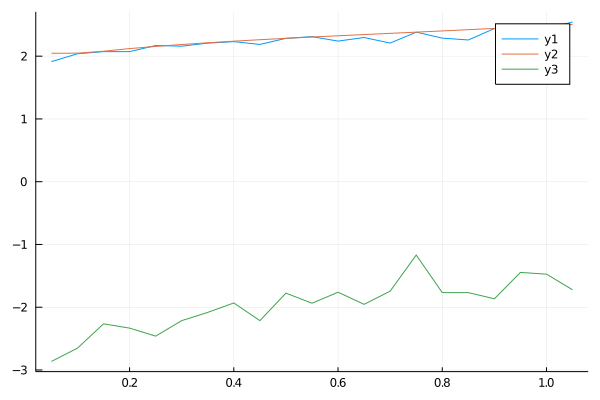

In [103]:
include("Simulations.jl")
x = 0.05:0.05:1.05

vals1 = broadcast(x -> Simulations.value_obs_pf([log(x), log(2.0)], solver1, 1000), x)
vals_s1 = broadcast(x -> BellmanOpperators.obs_Bellman([log(x), log(2.0)], solver1.obsBellmanIntermidiate[1],solver1.valueFunction.baseValue, solver1.POMDP, solver1.optimizer),
x)
vals_rand = broadcast(x -> Simulations.value_obs_random([log(x), log(2.0)], solver1, 100), x)

Plots.plot(x,vals1)
Plots.plot!(x,vals_s1)
Plots.plot!(x,vals_rand)

In [26]:
rand(solver1.POMDP.actions.actions)

1-element Array{Float64,1}:
 0.8317766166719343